In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from subprocess import Popen, PIPE

import math
import random

import drawsvg as draw
from drawsvg import Drawing
from hyperbolic import euclid, util
from hyperbolic.poincare import *


%matplotlib inline

In [3]:
alpha = 63
ngen = 10

In [4]:
p = Popen(os.getcwd() + '/dendrite',
          stdin=PIPE, text=True)
p.communicate(os.linesep.join([str(alpha/720), str(ngen)]))

p = Popen(os.getcwd() + '/refine4q',
          stdin=PIPE, text=True)
p.communicate(os.linesep.join(['match.dat', '10']))

p = Popen(os.getcwd() + '/ziptree4q',
          stdin=PIPE, text=True)
p.communicate('0')

ps = Popen(os.getcwd() + '/select', 
           stdin=PIPE, text=True)
ps.communicate(os.linesep.join(['tree.img', 'degree0.dat']))

  2\pi*alpha and \pi+2\pi*alpha correspond to
  the critical point $0$.
  Enter alpha
  number of generations?
  Name of file with matchings?
   [matchorig.dat]
 match.dat                                              
  Output files will be tree.dat and match.dat.
  number of initial intervals =        4094
   
  Number of subintervals of each interval=?[10]
  The number must be even or one.
          10
  total number of intervals       40940
  number of matches =       40940
  Enter 1 to include evaluation at interior points
  Else enter 0.
  number of endpoints =       40940
 cpu time for zipper approx. =  4643.77 sec.
  Name of file with tree? [tree.img]
 tree.img                                               
  Name of file with degrees?[degree0.dat]
 degree0.dat                                            


(None, None)

In [4]:
tree = pd.read_csv(os.getcwd() + '/treez.out',
                   header = None, sep='\s+')
c = pd.read_csv(os.getcwd() + '/quadcoeff.dat',
                   header = None, sep='\s+')
tree

,0,1
0,3.803693,10.763586
1,3.803790,10.763663
2,3.803887,10.763741
3,3.803984,10.763820
4,3.804081,10.763900
...,...,...
40935,3.804178,10.763981
40936,3.804081,10.763900
40937,3.803984,10.763820
40938,3.803887,10.763741


In [5]:
c

,0,1
0,-0.032562,1.023443


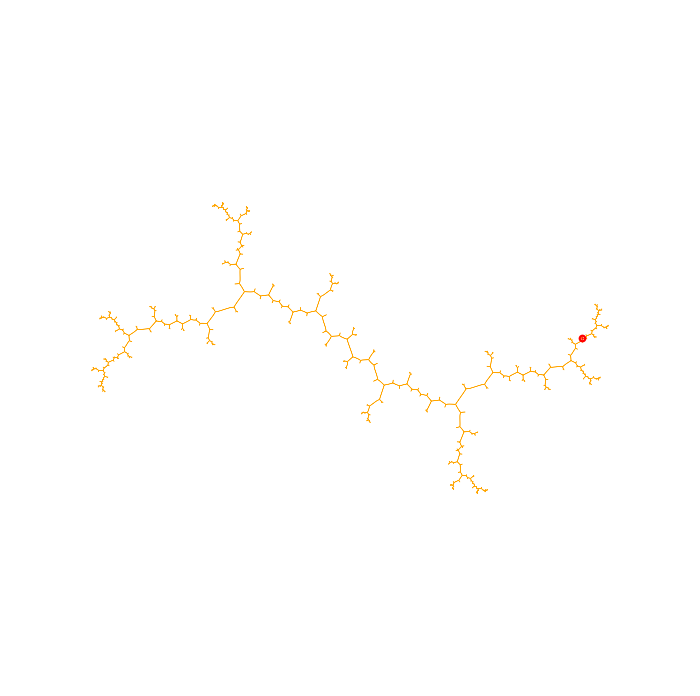

In [15]:
xc = (max(tree[0])+min(tree[0]))/2
yc = (max(tree[1])+min(tree[1]))/2
l = 1.2*max(max(tree[0])-min(tree[0]),max(tree[1])-min(tree[1]))/2

fig, main_ax = plt.subplots()
main_ax.set_xlim(xc-l, xc+l)
main_ax.set_ylim(yc-l, yc+l)

fig.set_dpi(400)
fig.set_figwidth(2)
fig.set_figheight(2)
fig.tight_layout

plt.axis('off')
plt.plot(tree[0], tree[1], linewidth=0.1, ls='-', c='orange')
plt.plot(c[0], c[0], marker='o', markersize=0.4, c='r')
plt.savefig(os.getcwd() + '/julia_set.pdf', format="pdf", bbox_inches = 'tight')

plt.show()

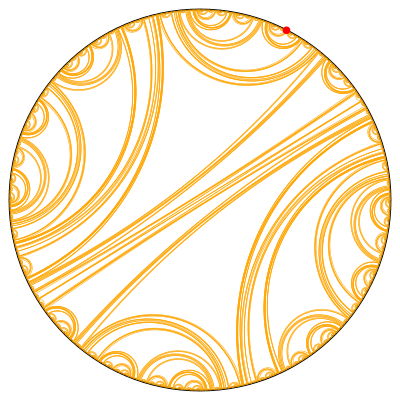

In [20]:
def L(x):
    if x/2 >= alpha/2:
        return x/2
    else:
        return x/2+180

def R(x):
    if x/2 >= alpha/2:
        return x/2-180
    else:
        return x/2  

pairs = [(alpha/2,(alpha+360)/2)]
last_lst = [(alpha/2,(alpha+360)/2)]

for i in range(ngen):
    cur_lst = []
    for pair in last_lst:
        cur_lst.append((L(pair[0]),L(pair[1])))
        cur_lst.append((R(pair[0]),R(pair[1])))
    pairs.extend(cur_lst)
    last_lst = cur_lst
    
d = Drawing(2.1, 2.1, origin='center')
d.draw(euclid.Circle(0, 0, 1), fill='none', stroke_width=0.01, stroke='black')

for pair in pairs:
    hl = Line.from_points(*Ideal.from_degree(-pair[0]), *Ideal.from_degree(-pair[1]), segment=True)
    d.draw(hl, stroke='orange', stroke_width=0.003, fill='none')

d.draw(Ideal.from_degree(-alpha), radius=0.02, fill='red')

d.set_render_size(400,400)
d.save_svg(os.getcwd() + '/lamination.svg')
d.save_png(os.getcwd() + '/lamination.png')

d

In [8]:
arr = [[1,2,3],[4,5,6],[7,8,9]]
arr

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [10]:
arr[0:2][0:2]

[[1, 2, 3], [4, 5, 6]]